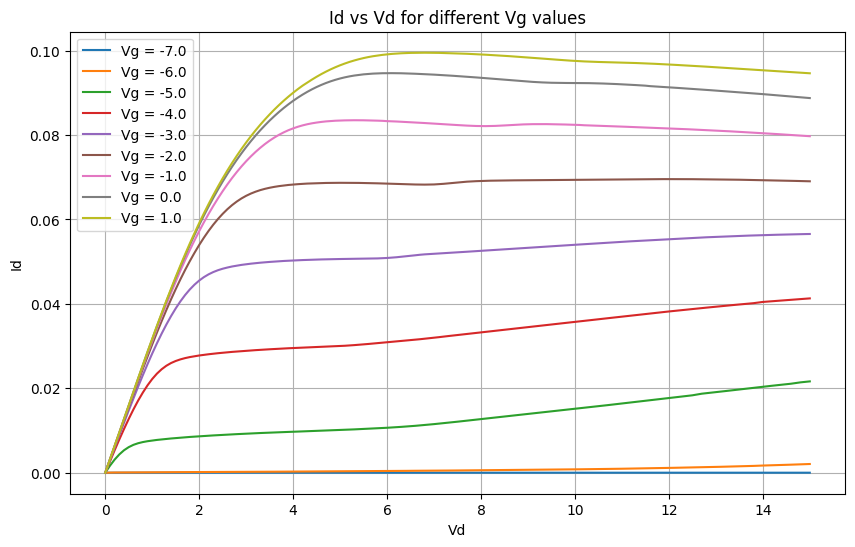

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pickle
import os

plt.figure(figsize=(10,6))

for j, vg in enumerate(Vg_vals):
    if np.isnan(vg):
        continue
    plt.plot(Vd_vals, id_matrix[:, j], label=f"Vg = {vg}")

plt.xlabel("Vd")
plt.ylabel("Id")
plt.title("Id vs Vd for different Vg values")
plt.legend()
plt.grid(True)
plt.show()


Mounted at /content/drive
TOTAL RAW LINES: 152

----- First 10 raw lines (index:line) -----
  0:    0.0000000e+00  -7.0000000e+00  -6.0000000e+00  -5.0000000e+00  -4.0000000e+00  -3.0000000e+00  -2.0000000e+00  -1.0000000e+00   0.0000000e+00   1.0000000e+00   0.0000000e+00  -7.0000000e+00  -6.0000000e+00  -5.0000000e+00  -4.0000000e+00  -3.0000000e+00  -2.0000000e+00  -1.0000000e+00   0.0000000e+00   1.0000000e+00
  1:    0.0000000e+00   1.6252700e-08  -3.5828800e-07  -6.0159900e-07  -1.9864300e-06   2.0403600e-06   1.3610400e-06   1.5747800e-06  -1.0993700e-07  -1.1287700e-07   0.0000000e+00  -6.5486300e-08  -4.8868700e-08  -1.2494200e-08  -2.6605000e-09  -1.2684600e-09  -5.2274500e-10  -4.4207600e-10   1.2084200e-10   9.4925200e-09
  2:    1.0000000e-01   1.6130300e-08   2.6684500e-05   1.6594700e-03   2.6927200e-03   2.9896100e-03   3.1109600e-03   3.1461800e-03   3.1684300e-03   3.1605200e-03   0.0000000e+00  -6.4431700e-08  -4.7958500e-08  -1.2322500e-08  -2.2668000e-09  -5.630610

/tmp/ipython-input-3853344383.py:70: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_no_headers.applymap(lambda x: str(x).strip() if pd.notna(x) else x).replace({'': pd.NA})


Vg_vals (header): [-7. -6. -5. -4. -3. -2. -1.  0.  1.]
Vd_vals (first column): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
id_matrix shape: (151, 9)
Parsed: n_vd (rows) = 151, n_vg (cols) = 9
Vg values (parsed from header): [-7. -6. -5. -4. -3. -2. -1.  0.  1.]
Train id columns (indices relative to id_matrix = Vg columns): [0, 1, 2, 3, 4, 5]
Test  id columns (indices relative to id_matrix = Vg columns): [6, 7, 8]
Training samples: 906, Test samples: 453

Test R^2: 0.237891, Test MSE: 3.847462e-04
Saved predictions to: /content/drive/MyDrive/predictions_idvd.csv
Saved trained model to: /content/drive/MyDrive/rf_idvd_model.pkl


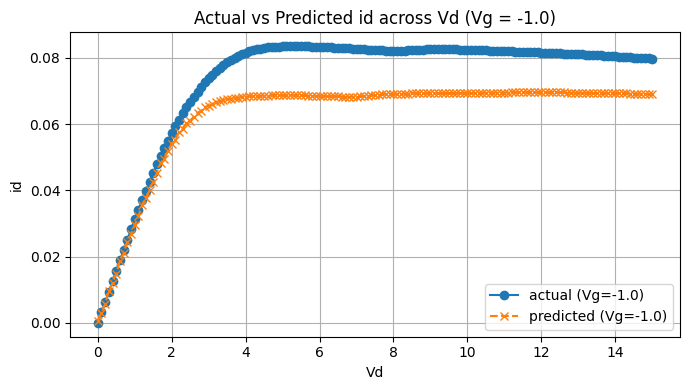

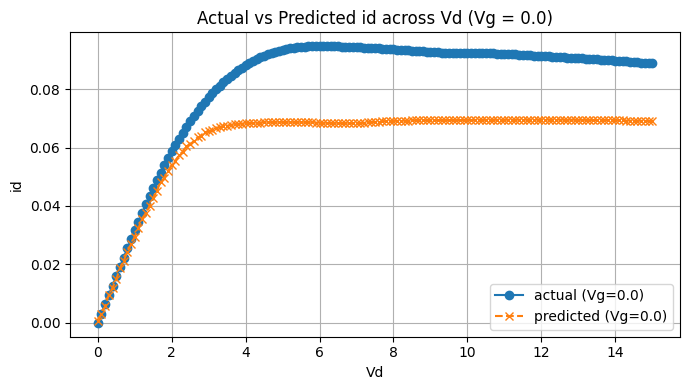

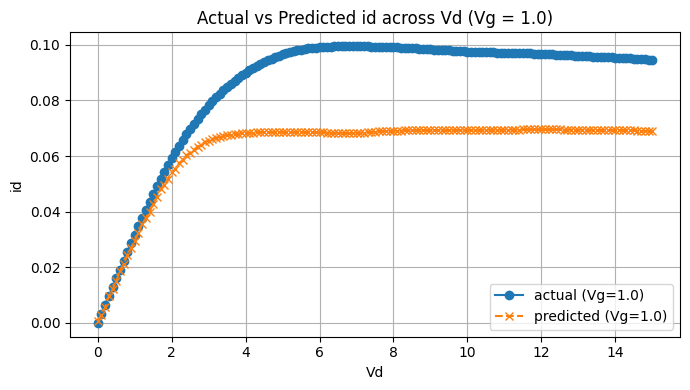

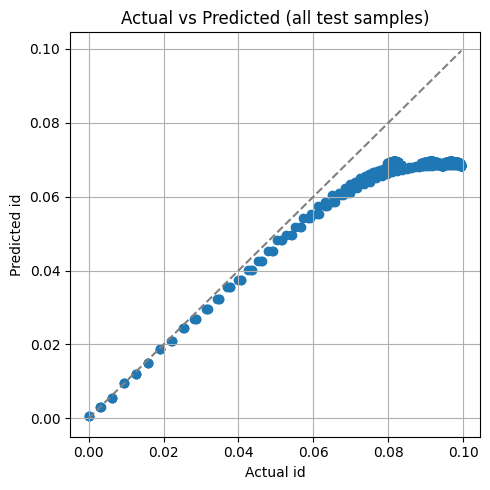


Sample of predictions:
 Vd   Vg  id_actual  id_pred
0.0 -1.0   0.000002 0.000682
0.1 -1.0   0.003146 0.002950
0.2 -1.0   0.006305 0.005636
0.3 -1.0   0.009471 0.009579
0.4 -1.0   0.012647 0.012044
0.5 -1.0   0.015808 0.014899
0.6 -1.0   0.018948 0.018700
0.7 -1.0   0.022075 0.021050
0.8 -1.0   0.025167 0.024405
0.9 -1.0   0.028223 0.026829
1.0 -1.0   0.031224 0.029509
1.1 -1.0   0.034176 0.032351
1.2 -1.0   0.037058 0.035606
1.3 -1.0   0.039874 0.037568
1.4 -1.0   0.042611 0.040046
1.5 -1.0   0.045271 0.042638
1.6 -1.0   0.047886 0.045195
1.7 -1.0   0.050368 0.048239
1.8 -1.0   0.052752 0.049575
1.9 -1.0   0.055042 0.051895

Plot for test Vg = -1.0
Using exact Vg=-1.0 from header.


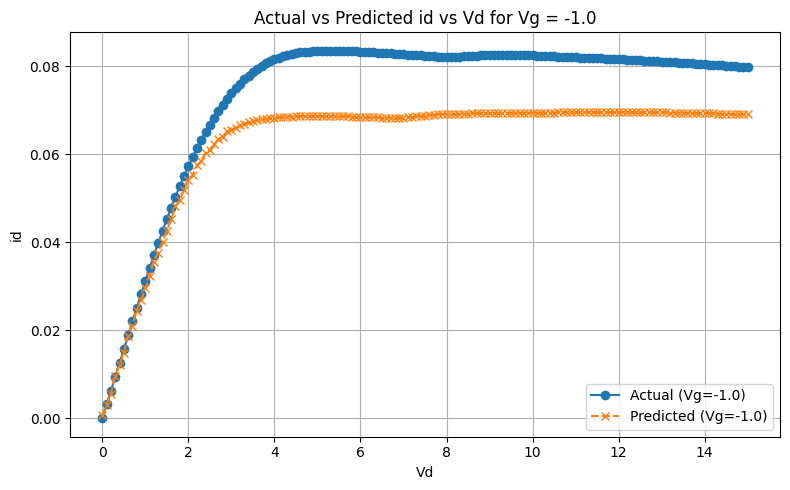


Plot for test Vg = 0.0
Using exact Vg=0.0 from header.


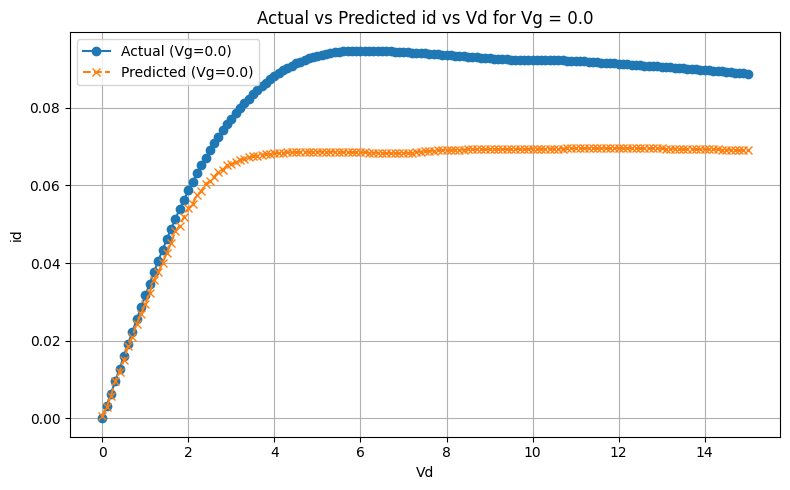


Plot for test Vg = 1.0
Using exact Vg=1.0 from header.


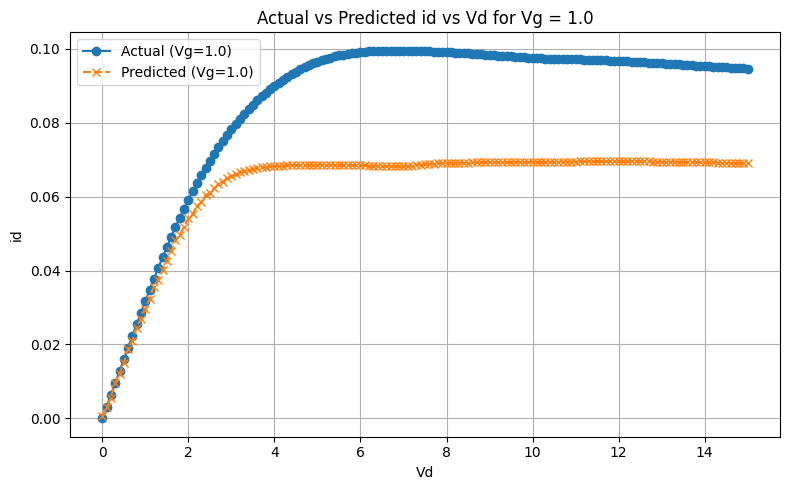

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/IdVd_D1_21_2.txt'

def is_float_try(s):
    try:
        float(s)
        return True
    except:
        return False

# Read raw lines for inspection
with open(file_path, 'r', errors='ignore') as f:
    lines = f.readlines()

print("TOTAL RAW LINES:", len(lines))
print("\n----- First 10 raw lines (index:line) -----")
for i, line in enumerate(lines[:10]):
    print(f"{i:3d}: {line.rstrip()}")

# Load as strings so we can detect headers
df_raw = pd.read_csv(file_path, sep=r'\s+', header=None, dtype=str, engine='python', comment='#', skip_blank_lines=False)
print("\nRaw dataframe shape (as strings):", df_raw.shape)

# Detect header-like rows
def row_has_alpha_or_nonnum(row):
    for cell in row:
        if pd.isna(cell):
            continue
        s = str(cell).strip()
        if re.search(r'[A-Za-z]', s):
            return True
        if not is_float_try(s):
            # treat common non-numeric tokens as header-like
            return True
    return False

header_rows_mask = df_raw.apply(row_has_alpha_or_nonnum, axis=1)
header_row_indices = df_raw.index[header_rows_mask].tolist()
print("\nDetected header-like row indices (contain letters / non-numeric tokens):", header_row_indices)

# Show row counts before/after dropping
print("\nRows before dropping header-like rows:", df_raw.shape[0])
if header_row_indices:
    df_no_headers = df_raw.drop(index=header_row_indices).reset_index(drop=True)
else:
    df_no_headers = df_raw.copy()
print("Rows after dropping header-like rows:", df_no_headers.shape[0])

# Assign/infer column names from first header-like row if present
if header_row_indices:
    first_header = df_raw.loc[header_row_indices[0]].fillna('').astype(str).str.strip().tolist()
    col_names = [n if n != '' else f'col{j}' for j,n in enumerate(first_header)]
else:
    col_names = [f'col{j}' for j in range(df_no_headers.shape[1])]

# Convert to numeric where possible
df_clean = df_no_headers.applymap(lambda x: str(x).strip() if pd.notna(x) else x).replace({'': pd.NA})
df_numeric = df_clean.apply(lambda col: pd.to_numeric(col, errors='coerce'))

# Name columns sensibly (truncate/pad)
ncols = df_numeric.shape[1]
if len(col_names) >= ncols:
    df_numeric.columns = col_names[:ncols]
else:
    df_numeric.columns = col_names + [f'col{j}' for j in range(len(col_names), ncols)]

print("\nFinal numeric dataframe shape:", df_numeric.shape)
print("Column names:", list(df_numeric.columns))
print("\nNull counts per column:")
print(df_numeric.isna().sum())

# Safe sampling
n_rows = df_numeric.shape[0]
if n_rows > 0:
    sample_n = min(5, n_rows)
    print(f"\nShowing a random sample of {sample_n} rows:")
    print(df_numeric.sample(sample_n))
else:
    print("\nWARNING: No numeric rows after cleaning. Here are the first 20 rows of the non-header (string) dataframe for inspection:")
    print(df_no_headers.head(20))

# Safe plotting: only if we have rows and at least two columns
if n_rows > 0 and df_numeric.shape[1] >= 2:
    # Heuristic: name first column 'Bias' if it doesn't have a bias-like name
    first_col = df_numeric.columns[0]
    if 'bias' not in str(first_col).lower():
        df_numeric = df_numeric.rename(columns={first_col: 'Bias'})
    if 'Bias' in df_numeric.columns:
        plt.figure(figsize=(10,6))
        cols_to_plot = [c for c in df_numeric.columns if c != 'Bias']
        for col in cols_to_plot[:20]:
            plt.plot(df_numeric['Bias'], df_numeric[col], marker='.', linestyle='-',
                     label=str(col))
        plt.xlabel('Bias')
        plt.ylabel('Measurement')
        plt.title('Bias vs Measurements (first 20 columns)')
        plt.legend(fontsize='small', ncol=2)
        plt.grid(True)
        plt.show()
    else:
        print("No 'Bias' column found; skipping plot.")
else:
    print("Not enough numeric data to plot (need at least 1 row and 2 columns).")

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pickle
import os

# Use df_numeric created earlier in your notebook
# Defensive cleanup: drop all-empty rows/cols and reset index
df_num = df_raw.dropna(how='all').dropna(axis=1, how='all').reset_index(drop=True)
# df_num.head()

# Ensure we have at least 2 rows (header + at least one data row) and >=8 columns as requested
if df_num.shape[0] < 2:
    raise RuntimeError("Not enough rows after cleaning. Need at least header row + one data row.")
if df_num.shape[1] < 8:
    raise RuntimeError(f"Need at least 8 columns; found {df_num.shape[1]}. Check your parsed dataframe.")

# Keep only the first 8 columns (index 0..7)
df8 = df_num.iloc[:, :10].astype(float).copy()

# Convert to numpy array for indexing convenience
arr = df8.values  # shape (n_rows, 8)

# According to idvd format now:
# - arr[0, :] is the Vg header row (first column is meaningless zero)
# - arr[1:, 0] are Vd values
# - arr[1:, 1:] is the id matrix: rows -> Vd, cols -> Vg
Vg_vals = arr[0, 1:]          # Vg values for columns 1..7
Vd_vals = arr[1:, 0]         # Vd values for rows 1..end
id_matrix = arr[1:, 1:]      # shape (n_vd, n_vg)

print("Vg_vals (header):", Vg_vals)
print("Vd_vals (first column):", Vd_vals[:10])
print("id_matrix shape:", id_matrix.shape)

n_vd, n_vg = id_matrix.shape
print(f"Parsed: n_vd (rows) = {n_vd}, n_vg (cols) = {n_vg}")
print("Vg values (parsed from header):", Vg_vals)

# Check for NaNs and warn
if np.isnan(Vg_vals).any():
    print("Warning: some Vg header values are NaN. Those columns will be skipped automatically.")
if np.isnan(Vd_vals).any():
    print("Warning: some Vd header values are NaN. Those rows will be skipped automatically.")

# Define train/test Vg columns as you asked (1-based -> 2-6 train, 7-8 test)
# Convert to 0-based indices relative to id_matrix columns (which correspond to Vg columns):
train_col_indices = list(range(0, min(6, n_vg)))   # 0..4 -> Vg columns 2..6 (1-based)
test_col_indices  = list(range(6, min(9, n_vg)))   # 5..6 -> Vg columns 7..8 (1-based)

if len(test_col_indices) == 0:
    print("Warning: No test Vg columns found in positions 7-8 (ids columns). Please check data or adjust indices.")
print("Train id columns (indices relative to id_matrix = Vg columns):", train_col_indices)
print("Test  id columns (indices relative to id_matrix = Vg columns):", test_col_indices)

# Build (Vd, Vg) -> id dataset and split by Vg column membership
X_train = []
y_train = []
X_test  = []
y_test  = []

for i in range(n_vd):
    vd = Vd_vals[i]
    for j in range(n_vg):
        vg = Vg_vals[j]
        val = id_matrix[i, j]
        if np.isnan(val) or np.isnan(vg) or np.isnan(vd):
            continue
        if j in train_col_indices:
            X_train.append([vd, vg])
            y_train.append(val)
        elif j in test_col_indices:
            X_test.append([vd, vg])
            y_test.append(val)
        # else: ignore any columns outside train/test selection

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test  = np.array(X_test)
y_test  = np.array(y_test)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

if X_train.shape[0] == 0 or X_test.shape[0] == 0:
    if X_train.shape[0] == 0:
        raise RuntimeError("Empty train set after splitting. Check that the id matrix had values in the requested training columns.")
    else:
        print("Warning: Empty test set after splitting. Check that the id matrix had values in the requested test columns.")

# Optional: add simple engineered features (uncomment if desired)
# from sklearn.preprocessing import PolynomialFeatures
# pf = PolynomialFeatures(degree=2, include_bias=False)
# X_train = pf.fit_transform(X_train)
# X_test  = pf.transform(X_test)

# Train a RandomForest regressor (you can swap to any regressor)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate (if test set not empty)
if X_test.shape[0] > 0:
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\nTest R^2: {r2:.6f}, Test MSE: {mse:.6e}")
else:
    print("\nNo test samples to evaluate metrics.")

# Build a results DataFrame and save (if test present)
if X_test.shape[0] > 0:
    results_df = pd.DataFrame({
        "Vd": X_test[:, 0],
        "Vg": X_test[:, 1],
        "id_actual": y_test,
        "id_pred": y_pred
    })
    # sort rows for nicer plotting
    results_df = results_df.sort_values(["Vg", "Vd"]).reset_index(drop=True)

    out_dir = os.path.dirname(file_path) or "."
    pred_file = os.path.join(out_dir, "predictions_idvd.csv")
    results_df.to_csv(pred_file, index=False)
    print(f"Saved predictions to: {pred_file}")

# Save model
out_dir = os.path.dirname(file_path) or "."
model_file = os.path.join(out_dir, "rf_idvd_model.pkl")
with open(model_file, "wb") as f:
    pickle.dump(model, f)
print(f"Saved trained model to: {model_file}")

# ------------------ Plots ------------------
# 1) For each test Vg, plot Vd vs actual and predicted (id vs Vd for a given Vg)
unique_test_vg = sorted(set(X_test[:,1])) if X_test.shape[0] > 0 else []
for vg in unique_test_vg:
    sub = results_df[results_df["Vg"] == vg].sort_values("Vd")
    plt.figure(figsize=(7,4))
    plt.plot(sub["Vd"], sub["id_actual"], marker='o', linestyle='-', label=f"actual (Vg={vg})")
    plt.plot(sub["Vd"], sub["id_pred"], marker='x', linestyle='--', label=f"predicted (Vg={vg})")
    plt.xlabel("Vd")
    plt.ylabel("id")
    plt.title(f"Actual vs Predicted id across Vd (Vg = {vg})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 2) Overall actual vs predicted scatter (with y=x ref) if test exists
if X_test.shape[0] > 0:
    plt.figure(figsize=(5,5))
    plt.scatter(results_df["id_actual"], results_df["id_pred"])
    mn = min(results_df["id_actual"].min(), results_df["id_pred"].min())
    mx = max(results_df["id_actual"].max(), results_df["id_pred"].max())
    plt.plot([mn, mx], [mn, mx], linestyle='--', color='gray')
    plt.xlabel("Actual id")
    plt.ylabel("Predicted id")
    plt.title("Actual vs Predicted (all test samples)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Print a small table of results if available
if X_test.shape[0] > 0:
    print("\nSample of predictions:")
    print(results_df.head(20).to_string(index=False))
else:
    print("\nNo test predictions to display.")

# ---------- Function: plot_for_vg(vg) -> id vs Vd (actual + predicted) ----------
def plot_for_vg(vg_value, match_tolerance=1e-8):
    """
    For a given Vg value (exact match or nearest in header), plot id vs Vd:
    - actual (from file) and predicted (from trained model).
    """
    # find nearest Vg in header
    vg_array = np.array(Vg_vals)
    diffs = np.abs(vg_array - float(vg_value))
    idx = int(np.argmin(diffs))
    chosen_vg = float(vg_array[idx])
    if diffs[idx] > match_tolerance:
        print(f"Requested Vg={vg_value} not found exactly in header. Using nearest Vg={chosen_vg} (diff={diffs[idx]:.3g}).")
    else:
        print(f"Using exact Vg={chosen_vg} from header.")

    # Extract actual id vs Vd if available
    actual_ids = id_matrix[:, idx]   # length n_vd
    # Some rows may be NaN; filter them
    mask = ~np.isnan(actual_ids) & ~np.isnan(Vd_vals)
    vd_valid = Vd_vals[mask]
    actual_valid = actual_ids[mask]

    if vd_valid.size == 0:
        raise RuntimeError(f"No valid actual id values available for Vg column index {idx}.")

    # Predict for the same vd values
    Xq = np.column_stack([vd_valid, np.full(len(vd_valid), chosen_vg)])
    pred_valid = model.predict(Xq)

    # Plot actual vs predicted (id vs Vd)
    plt.figure(figsize=(8,5))
    plt.plot(vd_valid, actual_valid, marker='o', linestyle='-', label=f'Actual (Vg={chosen_vg})')
    plt.plot(vd_valid, pred_valid, marker='x', linestyle='--', label=f'Predicted (Vg={chosen_vg})')
    plt.xlabel('Vd')
    plt.ylabel('id')
    plt.title(f'Actual vs Predicted id vs Vd for Vg = {chosen_vg}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return vd_valid, actual_valid, pred_valid

# Example: call plot_for_vg for each test Vg if present
if X_test.shape[0] > 0:
    test_vgs = sorted(set(X_test[:,1]))
    for tvg in test_vgs:
        print(f"\nPlot for test Vg = {tvg}")
        plot_for_vg(tvg)
else:
    print("\nNo test Vg columns available to plot using plot_for_vg(). You can still call plot_for_vg(vg) for any header Vg.")


Original shapes: id_matrix (n_vd, n_vg) = (151, 19)
Original Vg header (sample): [-7. -6. -5. -4. -3. -2. -1.  0.  1.  0.]
Original Vd column (sample): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]

After filtering:
  Kept Vg count: 15 Kept Vg values: [-5. -4. -3. -2. -1.  0.  1.  0. -5. -4. -3. -2. -1.  0.  1.]
  Kept Vd count: 61 Kept Vd (first few): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
  id_matrix shape now: (61, 15)
Train id columns (indices relative to id_matrix = Vg columns): [0, 1, 2, 3, 4, 5]
Test  id columns (indices relative to id_matrix = Vg columns): [6, 7, 8]

Training samples: 366, Test samples: 183

Test R^2: -0.331754, Test MSE: 1.756034e-03
Saved predictions to: /content/drive/MyDrive/predictions_idvd_filtered.csv
Saved trained model to: /content/drive/MyDrive/rf_idvd_model_filtered.pkl

Plot for test Vg = -5.0
Using exact Vg=-5.0 from header.


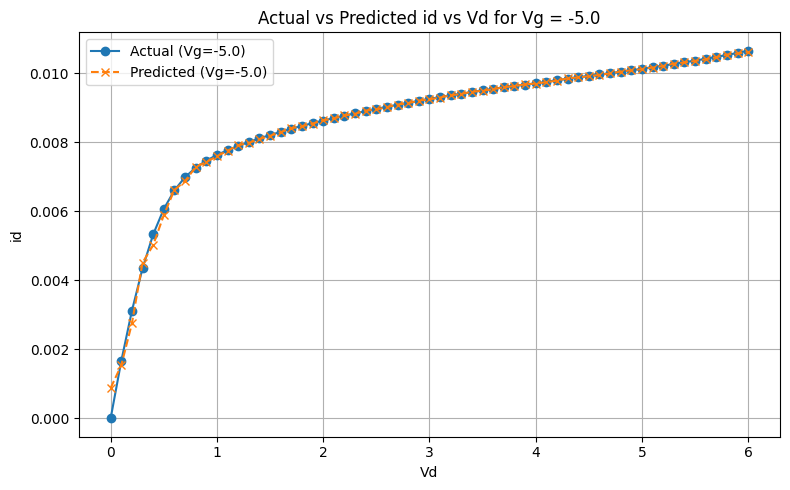


Plot for test Vg = 0.0
Using exact Vg=0.0 from header.


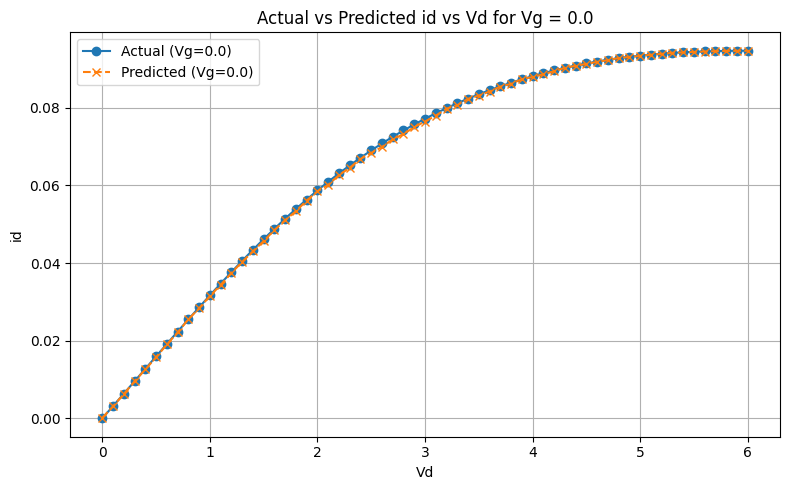


Plot for test Vg = 1.0
Using exact Vg=1.0 from header.


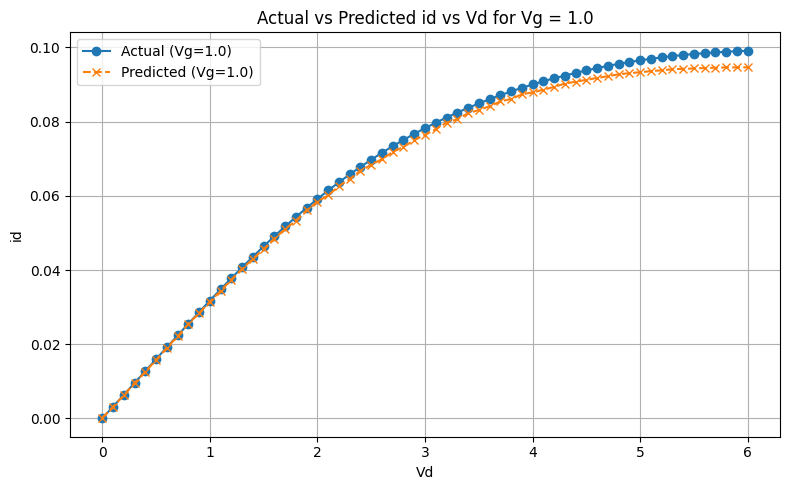

In [ ]:
# ----------------- Cell 3: Apply requested filters, then train & plot -----------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Expecting `arr` to exist from Cell 2 (df8.values)
# If not present, reconstruct like in Cell 2 (but this should be unnecessary)
try:
    _ = arr
except NameError:
    # try to build arr from df_num or df_numeric if needed
    if 'df_num' in globals():
        df_tmp = df_num.dropna(how='all').dropna(axis=1, how='all').reset_index(drop=True)
    elif 'df_numeric' in globals():
        df_tmp = df_numeric.dropna(how='all').dropna(axis=1, how='all').reset_index(drop=True)
    else:
        raise RuntimeError("arr not found and cannot reconstruct. Ensure Cell 1 & 2 ran.")
    arr = df_tmp.iloc[:, :10].astype(float).values  # same as you used

# Original orientation in your Cell 2:
# arr[0,1:] are Vg header values; arr[1:,0] are Vd values; arr[1:,1:] is id_matrix (shape n_vd x n_vg)
Vg_vals_orig = arr[0, 1:].astype(float)      # header Vg values (columns)
Vd_vals_orig = arr[1:, 0].astype(float)      # row Vd values (rows)
id_matrix_orig = arr[1:, 1:].astype(float)   # shape (n_vd, n_vg)

print("Original shapes: id_matrix (n_vd, n_vg) =", id_matrix_orig.shape)
print("Original Vg header (sample):", Vg_vals_orig[:10])
print("Original Vd column (sample):", Vd_vals_orig[:10])

# ------------------ APPLY FILTERS ------------------
# 1) Remove vg = -6, -7 (filter out these Vg columns)
bad_vg_values = [-6.0, -7.0]
keep_vg_mask = np.ones_like(Vg_vals_orig, dtype=bool)
for bad in bad_vg_values:
    keep_vg_mask &= ~np.isclose(Vg_vals_orig, bad, atol=1e-8)

# 2) Remove rows with Vd > 6 (keep Vd <= 6)
keep_vd_mask = ~np.isnan(Vd_vals_orig) & (Vd_vals_orig <= 6.0)

# Apply masks to produce filtered arrays
Vg_vals = Vg_vals_orig[keep_vg_mask]
Vd_vals = Vd_vals_orig[keep_vd_mask]
id_matrix = id_matrix_orig[keep_vd_mask, :][:, keep_vg_mask]  # rows filtered by Vd, cols filtered by Vg

n_vd, n_vg = id_matrix.shape
print("\nAfter filtering:")
print("  Kept Vg count:", n_vg, "Kept Vg values:", Vg_vals)
print("  Kept Vd count:", n_vd, "Kept Vd (first few):", Vd_vals[:10])
print("  id_matrix shape now:", id_matrix.shape)

# ------------------ proceed with your pipeline (unchanged logic) ------------------
# Check for NaNs and warn
if np.isnan(Vg_vals).any():
    print("Warning: some Vg header values are NaN. Those columns will be skipped automatically.")
if np.isnan(Vd_vals).any():
    print("Warning: some Vd header values are NaN. Those rows will be skipped automatically.")

# Define train/test Vg columns as you asked (1-based -> 2-6 train, 7-8 test)
# These indices are relative to id_matrix columns (which correspond to Vg columns after filtering)
train_col_indices = list(range(0, min(6, n_vg)))   # 0..5  -> corresponds to header Vg columns 1..6 (after filtering)
test_col_indices  = list(range(6, min(9, n_vg)))   # 6..8 -> corresponds to header Vg columns 7..9 (after filtering)

if len(test_col_indices) == 0:
    print("Warning: No test Vg columns found in positions 7-8 (ids columns) after filtering. Please check data or adjust indices.")
print("Train id columns (indices relative to id_matrix = Vg columns):", train_col_indices)
print("Test  id columns (indices relative to id_matrix = Vg columns):", test_col_indices)

# Build (Vd, Vg) -> id dataset and split by Vg column membership
X_train = []
y_train = []
X_test  = []
y_test  = []

for i in range(n_vd):
    vd = Vd_vals[i]
    for j in range(n_vg):
        vg = Vg_vals[j]
        val = id_matrix[i, j]
        if np.isnan(val) or np.isnan(vg) or np.isnan(vd):
            continue
        if j in train_col_indices:
            X_train.append([vd, vg])
            y_train.append(val)
        elif j in test_col_indices:
            X_test.append([vd, vg])
            y_test.append(val)
        # else: ignore any columns outside train/test selection

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test  = np.array(X_test)
y_test  = np.array(y_test)

print(f"\nTraining samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

if X_train.shape[0] == 0 or X_test.shape[0] == 0:
    if X_train.shape[0] == 0:
        raise RuntimeError("Empty train set after splitting. Check that the id matrix had values in the requested training columns.")
    else:
        print("Warning: Empty test set after splitting. Check that the id matrix had values in the requested test columns.")

# Train a RandomForest regressor (you can swap to any regressor)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate (if test set not empty)
if X_test.shape[0] > 0:
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\nTest R^2: {r2:.6f}, Test MSE: {mse:.6e}")
else:
    print("\nNo test samples to evaluate metrics.")

# Build a results DataFrame and save (if test present)
if X_test.shape[0] > 0:
    results_df = pd.DataFrame({
        "Vd": X_test[:, 0],
        "Vg": X_test[:, 1],
        "id_actual": y_test,
        "id_pred": y_pred
    })
    # sort rows for nicer plotting
    results_df = results_df.sort_values(["Vg", "Vd"]).reset_index(drop=True)

    out_dir = os.path.dirname(file_path) or "."
    pred_file = os.path.join(out_dir, "predictions_idvd_filtered.csv")
    results_df.to_csv(pred_file, index=False)
    print(f"Saved predictions to: {pred_file}")

# Save model
out_dir = os.path.dirname(file_path) or "."
model_file = os.path.join(out_dir, "rf_idvd_model_filtered.pkl")
with open(model_file, "wb") as f:
    pickle.dump(model, f)
print(f"Saved trained model to: {model_file}")

# ------------------ Plots ------------------
# 1) For each test Vg, plot Vd vs actual and predicted (id vs Vd for a given Vg)
# if X_test.shape[0] > 0:
#     unique_test_vg = sorted(set(X_test[:,1]))
#     for vg in unique_test_vg:
#         sub = results_df[results_df["Vg"] == vg].sort_values("Vd")
#         plt.figure(figsize=(7,4))
#         plt.plot(sub["Vd"], sub["id_actual"], marker='o', linestyle='-', label=f"actual (Vg={vg})")
#         plt.plot(sub["Vd"], sub["id_pred"], marker='x', linestyle='--', label=f"predicted (Vg={vg})")
#         plt.xlabel("Vd")
#         plt.ylabel("id")
#         plt.title(f"Actual vs Predicted id across Vd (Vg = {vg})")
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
#         plt.show()

#     # 2) Overall actual vs predicted scatter (with y=x ref)
#     plt.figure(figsize=(5,5))
#     plt.scatter(results_df["id_actual"], results_df["id_pred"])
#     mn = min(results_df["id_actual"].min(), results_df["id_pred"].min())
#     mx = max(results_df["id_actual"].max(), results_df["id_pred"].max())
#     plt.plot([mn, mx], [mn, mx], linestyle='--', color='gray')
#     plt.xlabel("Actual id")
#     plt.ylabel("Predicted id")
#     plt.title("Actual vs Predicted (all test samples)")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# Print a small table of results if available
# if X_test.shape[0] > 0:
#     print("\nSample of predictions:")
#     print(results_df.head(20).to_string(index=False))
# else:
#     print("\nNo test predictions to display.")

# ---------- Function: plot_for_vg(vg) -> id vs Vd (actual + predicted) ----------
def plot_for_vg(vg_value, match_tolerance=1e-8):
    """
    For a given Vg value (exact match or nearest in header), plot id vs Vd:
    - actual (from file) and predicted (from trained model).
    """
    # find nearest Vg in header
    vg_array = np.array(Vg_vals)
    diffs = np.abs(vg_array - float(vg_value))
    idx = int(np.argmin(diffs))
    chosen_vg = float(vg_array[idx])
    if diffs[idx] > match_tolerance:
        print(f"Requested Vg={vg_value} not found exactly in header. Using nearest Vg={chosen_vg} (diff={diffs[idx]:.3g}).")
    else:
        print(f"Using exact Vg={chosen_vg} from header.")

    # Extract actual id vs Vd if available
    actual_ids = id_matrix[:, idx]   # length n_vd
    # Some rows may be NaN; filter them
    mask = ~np.isnan(actual_ids) & ~np.isnan(Vd_vals)
    vd_valid = Vd_vals[mask]
    actual_valid = actual_ids[mask]

    if vd_valid.size == 0:
        raise RuntimeError(f"No valid actual id values available for Vg column index {idx}.")

    # Predict for the same vd values
    Xq = np.column_stack([vd_valid, np.full(len(vd_valid), chosen_vg)])
    pred_valid = model.predict(Xq)

    # Plot actual vs predicted (id vs Vd)
    plt.figure(figsize=(8,5))
    plt.plot(vd_valid, actual_valid, marker='o', linestyle='-', label=f'Actual (Vg={chosen_vg})')
    plt.plot(vd_valid, pred_valid, marker='x', linestyle='--', label=f'Predicted (Vg={chosen_vg})')
    plt.xlabel('Vd')
    plt.ylabel('id')
    plt.title(f'Actual vs Predicted id vs Vd for Vg = {chosen_vg}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return vd_valid, actual_valid, pred_valid

# Example: call plot_for_vg for each test Vg if present
if X_test.shape[0] > 0:
    test_vgs = sorted(set(X_test[:,1]))
    for tvg in test_vgs:
        print(f"\nPlot for test Vg = {tvg}")
        plot_for_vg(tvg)
else:
    print("\nNo test Vg columns available to plot using plot_for_vg(). You can still call plot_for_vg(vg) for any header Vg.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
After filtering: n_vd (rows) = 61, n_vg (cols) = 7
Vg values (after filtering): [-5. -4. -3. -2. -1.  0.  1.]
Vd values (first 10, after filtering): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Train Vg values: [-5. -4. -3. -2.]
Test  Vg values: [-1.  0.  1.]
Training samples: 244, Test samples: 183

Test R^2: 0.722187, Test MSE: 2.235911e-04
Saved predictions to: /content/drive/MyDrive/predictions_idvd.csv
Saved trained model to: /content/drive/MyDrive/rf_idvd_model.pkl


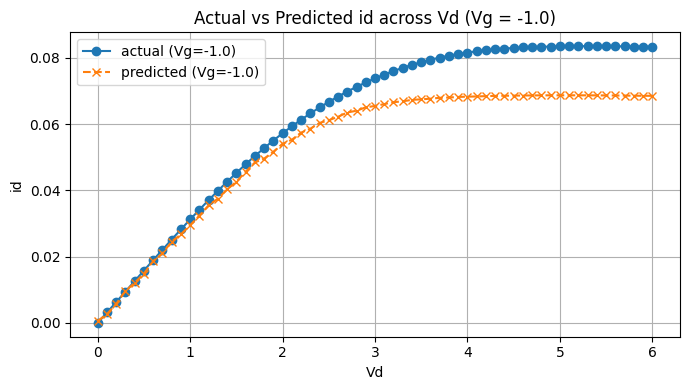

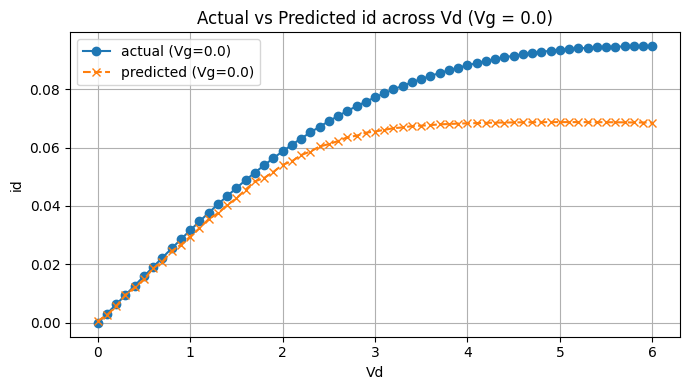

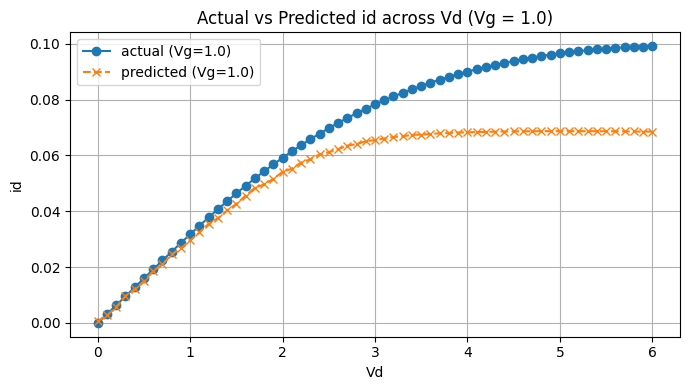

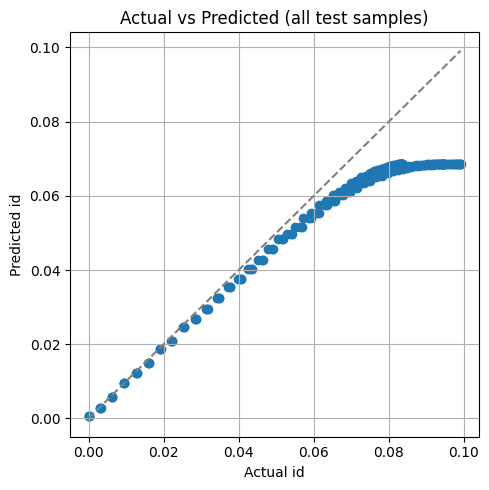


Sample of predictions:
 Vd   Vg  id_actual  id_pred
0.0 -1.0   0.000002 0.000604
0.1 -1.0   0.003146 0.002669
0.2 -1.0   0.006305 0.005750
0.3 -1.0   0.009471 0.009625
0.4 -1.0   0.012647 0.012124
0.5 -1.0   0.015808 0.014880
0.6 -1.0   0.018948 0.018662
0.7 -1.0   0.022075 0.020975
0.8 -1.0   0.025167 0.024547
0.9 -1.0   0.028223 0.026757
1.0 -1.0   0.031224 0.029515
1.1 -1.0   0.034176 0.032391
1.2 -1.0   0.037058 0.035506
1.3 -1.0   0.039874 0.037500
1.4 -1.0   0.042611 0.040295
1.5 -1.0   0.045271 0.042615
1.6 -1.0   0.047886 0.045606
1.7 -1.0   0.050368 0.048408
1.8 -1.0   0.052752 0.049581
1.9 -1.0   0.055042 0.051645

Plot for test Vg = -1.0
Using exact Vg=-1.0 from header.


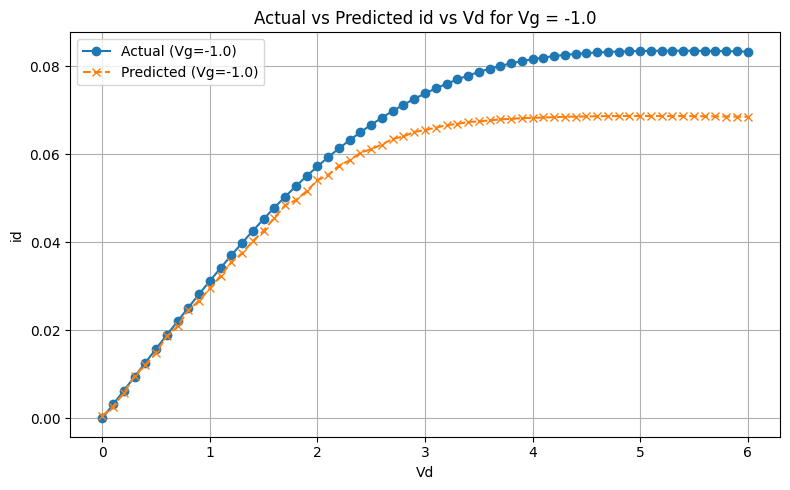


Plot for test Vg = 0.0
Using exact Vg=0.0 from header.


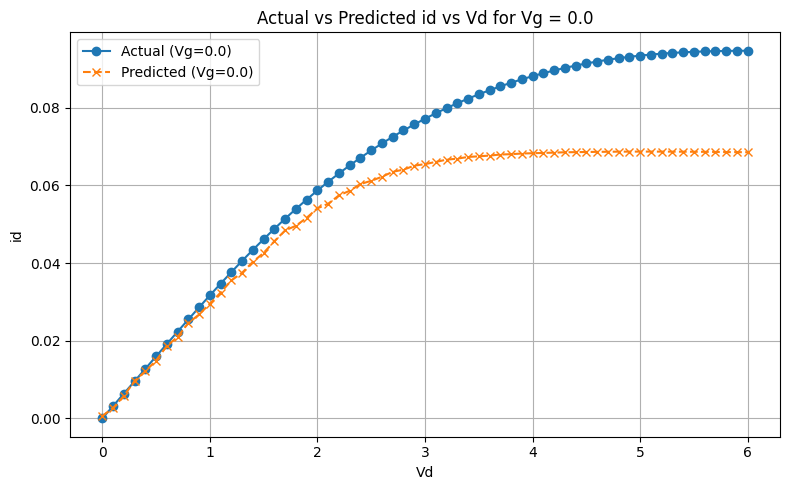


Plot for test Vg = 1.0
Using exact Vg=1.0 from header.


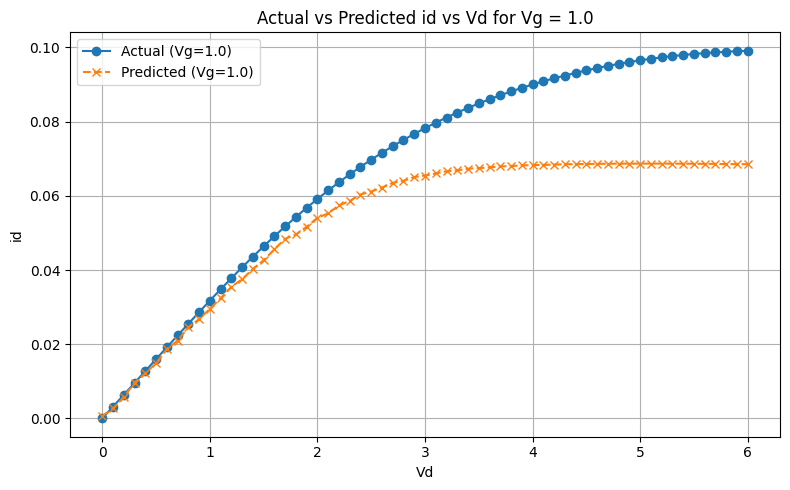

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pickle
import os

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/IdVd_D1_21_2.txt'

def is_float_try(s):
    try:
        float(s)
        return True
    except:
        return False

with open(file_path, 'r', errors='ignore') as f:
    lines = f.readlines()

df_raw = pd.read_csv(file_path, sep=r'\s+', header=None, dtype=float, engine='python', comment='#', skip_blank_lines=False)

df_num = df_raw.dropna(how='all').dropna(axis=1, how='all').reset_index(drop=True)

if df_num.shape[0] < 2:
    raise RuntimeError("Not enough rows after cleaning. Need at least header row + one data row.")
if df_num.shape[1] < 8:
    raise RuntimeError(f"Need at least 8 columns; found {df_num.shape[1]}. Check your parsed dataframe.")

df8 = df_num.iloc[:, :10].astype(float).copy()
arr = df8.values

Vg_vals = arr[0, 1:].astype(float)
Vd_vals = arr[1:, 0].astype(float)
id_matrix = arr[1:, 1:].astype(float)

# FILTER 1: remove Vg = -6 and -7, and keep only Vg in [-5, 1]
vg_mask = (~np.isin(Vg_vals, [-6.0, -7.0])) & (Vg_vals >= -5.0) & (Vg_vals <= 1.0)
Vg_vals = Vg_vals[vg_mask]
id_matrix = id_matrix[:, vg_mask]

# FILTER 2: remove rows with Vd > 6 (keep Vd <= 6)
vd_mask = (Vd_vals <= 6.0)
Vd_vals = Vd_vals[vd_mask]
id_matrix = id_matrix[vd_mask, :]

n_vd, n_vg = id_matrix.shape
print(f"After filtering: n_vd (rows) = {n_vd}, n_vg (cols) = {n_vg}")
print("Vg values (after filtering):", Vg_vals)
print("Vd values (first 10, after filtering):", Vd_vals[:10])

if np.isnan(Vg_vals).any():
    print("Warning: some Vg header values are NaN. Those columns will be skipped automatically.")
if np.isnan(Vd_vals).any():
    print("Warning: some Vd header values are NaN. Those rows will be skipped automatically.")

# Define train/test by Vg value ranges:
# total Vg considered: [-5, 1]
# train: Vg in [-5, -2]
# test:  Vg in [-1,  1]
train_mask_by_value = (Vg_vals >= -5.0) & (Vg_vals <= -2.0)
test_mask_by_value  = (Vg_vals >= -1.0) & (Vg_vals <=  1.0)

print("Train Vg values:", Vg_vals[train_mask_by_value])
print("Test  Vg values:", Vg_vals[test_mask_by_value])

X_train = []
y_train = []
X_test  = []
y_test  = []

for i in range(n_vd):
    vd = Vd_vals[i]
    for j in range(n_vg):
        vg = Vg_vals[j]
        val = id_matrix[i, j]
        if np.isnan(val) or np.isnan(vg) or np.isnan(vd):
            continue
        if train_mask_by_value[j]:
            X_train.append([vd, vg])
            y_train.append(val)
        elif test_mask_by_value[j]:
            X_test.append([vd, vg])
            y_test.append(val)
        # ignore Vg columns in [-2, -1) or outside the specified ranges

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test  = np.array(X_test)
y_test  = np.array(y_test)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

if X_train.shape[0] == 0:
    raise RuntimeError("Empty train set after splitting. Check that the id matrix had values in the requested training Vg range [-5,-2].")
if X_test.shape[0] == 0:
    print("Warning: Empty test set after splitting. Check that the id matrix had values in the requested test Vg range [-1,1].")

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

if X_test.shape[0] > 0:
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\nTest R^2: {r2:.6f}, Test MSE: {mse:.6e}")
else:
    print("\nNo test samples to evaluate metrics.")

if X_test.shape[0] > 0:
    results_df = pd.DataFrame({
        "Vd": X_test[:, 0],
        "Vg": X_test[:, 1],
        "id_actual": y_test,
        "id_pred": y_pred
    })
    results_df = results_df.sort_values(["Vg", "Vd"]).reset_index(drop=True)
    out_dir = os.path.dirname(file_path) or "."
    pred_file = os.path.join(out_dir, "predictions_idvd.csv")
    results_df.to_csv(pred_file, index=False)
    print(f"Saved predictions to: {pred_file}")

out_dir = os.path.dirname(file_path) or "."
model_file = os.path.join(out_dir, "rf_idvd_model.pkl")
with open(model_file, "wb") as f:
    pickle.dump(model, f)
print(f"Saved trained model to: {model_file}")

if X_test.shape[0] > 0:
    unique_test_vg = sorted(set(results_df["Vg"].values))
    for vg in unique_test_vg:
        sub = results_df[results_df["Vg"] == vg].sort_values("Vd")
        plt.figure(figsize=(7,4))
        plt.plot(sub["Vd"], sub["id_actual"], marker='o', linestyle='-', label=f"actual (Vg={vg})")
        plt.plot(sub["Vd"], sub["id_pred"], marker='x', linestyle='--', label=f"predicted (Vg={vg})")
        plt.xlabel("Vd")
        plt.ylabel("id")
        plt.title(f"Actual vs Predicted id across Vd (Vg = {vg})")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

if X_test.shape[0] > 0:
    plt.figure(figsize=(5,5))
    plt.scatter(results_df["id_actual"], results_df["id_pred"])
    mn = min(results_df["id_actual"].min(), results_df["id_pred"].min())
    mx = max(results_df["id_actual"].max(), results_df["id_pred"].max())
    plt.plot([mn, mx], [mn, mx], linestyle='--', color='gray')
    plt.xlabel("Actual id")
    plt.ylabel("Predicted id")
    plt.title("Actual vs Predicted (all test samples)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if X_test.shape[0] > 0:
    print("\nSample of predictions:")
    print(results_df.head(20).to_string(index=False))
else:
    print("\nNo test predictions to display.")

def plot_for_vg(vg_value, match_tolerance=1e-8):
    vg_array = np.array(Vg_vals)
    diffs = np.abs(vg_array - float(vg_value))
    idx = int(np.argmin(diffs))
    chosen_vg = float(vg_array[idx])
    if diffs[idx] > match_tolerance:
        print(f"Requested Vg={vg_value} not found exactly in header. Using nearest Vg={chosen_vg} (diff={diffs[idx]:.3g}).")
    else:
        print(f"Using exact Vg={chosen_vg} from header.")

    actual_ids = id_matrix[:, idx]
    mask = ~np.isnan(actual_ids) & ~np.isnan(Vd_vals)
    vd_valid = Vd_vals[mask]
    actual_valid = actual_ids[mask]

    if vd_valid.size == 0:
        raise RuntimeError(f"No valid actual id values available for Vg column index {idx}.")

    Xq = np.column_stack([vd_valid, np.full(len(vd_valid), chosen_vg)])
    pred_valid = model.predict(Xq)

    plt.figure(figsize=(8,5))
    plt.plot(vd_valid, actual_valid, marker='o', linestyle='-', label=f'Actual (Vg={chosen_vg})')
    plt.plot(vd_valid, pred_valid, marker='x', linestyle='--', label=f'Predicted (Vg={chosen_vg})')
    plt.xlabel('Vd')
    plt.ylabel('id')
    plt.title(f'Actual vs Predicted id vs Vd for Vg = {chosen_vg}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return vd_valid, actual_valid, pred_valid

if X_test.shape[0] > 0:
    test_vgs = sorted(set(X_test[:,1]))
    for tvg in test_vgs:
        print(f"\nPlot for test Vg = {tvg}")
        plot_for_vg(tvg)
else:
    print("\nNo test Vg columns available to plot using plot_for_vg(). You can still call plot_for_vg(vg) for any header Vg.")


After filtering: n_vd=61, n_vg=7
Samples -> train: 244  test: 183
Training complete.
Test R^2: 0.055144, Test MSE: 7.604440e-04
Saved model: /content/drive/MyDrive/fast_hgb_idvd_model.pkl
Saved predictions: /content/drive/MyDrive/predictions_idvd_fast.csv


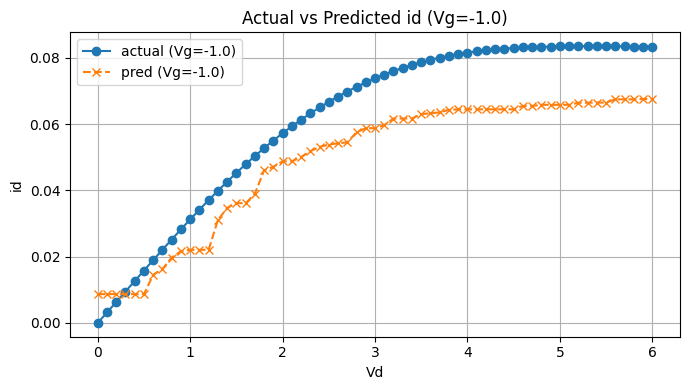

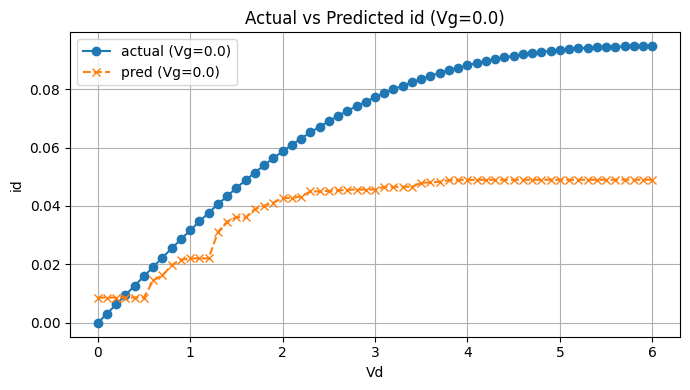

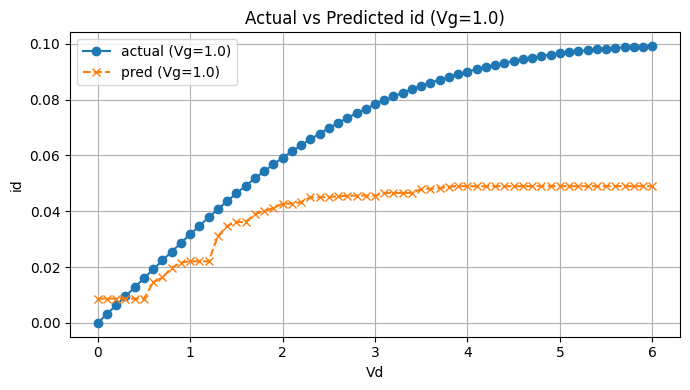

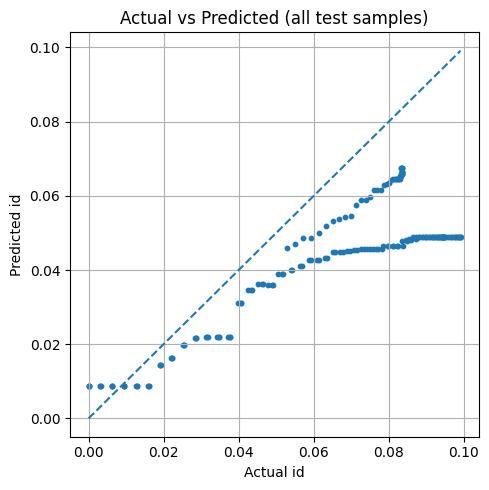


Sample predictions:
 Vd   Vg  id_actual  id_pred
0.0 -1.0   0.000002 0.008680
0.1 -1.0   0.003146 0.008680
0.2 -1.0   0.006305 0.008680
0.3 -1.0   0.009471 0.008680
0.4 -1.0   0.012647 0.008680
0.5 -1.0   0.015808 0.008680
0.6 -1.0   0.018948 0.014515
0.7 -1.0   0.022075 0.016271
0.8 -1.0   0.025167 0.019716
0.9 -1.0   0.028223 0.021626
1.0 -1.0   0.031224 0.022060
1.1 -1.0   0.034176 0.022060
1.2 -1.0   0.037058 0.022060
1.3 -1.0   0.039874 0.031051
1.4 -1.0   0.042611 0.034685
1.5 -1.0   0.045271 0.036176
1.6 -1.0   0.047886 0.036075
1.7 -1.0   0.050368 0.038975
1.8 -1.0   0.052752 0.046038
1.9 -1.0   0.055042 0.047128


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
from google.colab import drive
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/IdVd_D1_21_2.txt'

df_raw = pd.read_csv(file_path, sep=r'\s+', header=None, dtype=float, engine='python', comment='#', skip_blank_lines=False)
df_num = df_raw.dropna(how='all').dropna(axis=1, how='all').reset_index(drop=True)

if df_num.shape[0] < 2 or df_num.shape[1] < 8:
    raise RuntimeError("Input file doesn't have enough numeric rows/columns after cleaning.")

df8 = df_num.iloc[:, :10].astype(float).copy()
arr = df8.values
Vg_vals = arr[0, 1:].astype(float)
Vd_vals = arr[1:, 0].astype(float)
id_matrix = arr[1:, 1:].astype(float)

vg_mask = (~np.isin(Vg_vals, [-6.0, -7.0])) & (Vg_vals >= -5.0) & (Vg_vals <= 1.0)
Vg_vals = Vg_vals[vg_mask]
id_matrix = id_matrix[:, vg_mask]

vd_mask = (Vd_vals <= 6.0)
Vd_vals = Vd_vals[vd_mask]
id_matrix = id_matrix[vd_mask, :]

n_vd, n_vg = id_matrix.shape
print(f"After filtering: n_vd={n_vd}, n_vg={n_vg}")

X_list = []
y_list = []
for i in range(n_vd):
    vd = Vd_vals[i]
    for j in range(n_vg):
        vg = Vg_vals[j]
        val = id_matrix[i, j]
        if np.isnan(val) or np.isnan(vg) or np.isnan(vd):
            continue
        X_list.append([vd, vg])
        y_list.append(val)
X = np.array(X_list)
y = np.array(y_list)

mask_total_vg = (X[:,1] >= -5.0) & (X[:,1] <= 1.0)
X = X[mask_total_vg]
y = y[mask_total_vg]

train_mask_by_value = (X[:,1] >= -5.0) & (X[:,1] <= -2.0)
test_mask_by_value  = (X[:,1] >= -1.0) & (X[:,1] <=  1.0)

X_train_all = X[train_mask_by_value]
y_train_all = y[train_mask_by_value]
X_test_all  = X[test_mask_by_value]
y_test_all  = y[test_mask_by_value]

print("Samples -> train:", X_train_all.shape[0], " test:", X_test_all.shape[0])

MAX_TRAIN_SAMPLES = 8000
if MAX_TRAIN_SAMPLES is not None and X_train_all.shape[0] > MAX_TRAIN_SAMPLES:
    rng = np.random.default_rng(42)
    idx = rng.choice(np.arange(X_train_all.shape[0]), size=MAX_TRAIN_SAMPLES, replace=False)
    X_train_all = X_train_all[idx]
    y_train_all = y_train_all[idx]
    print("Subsampled training to", X_train_all.shape[0])

def make_features(Xraw):
    vd = Xraw[:,0]
    vg = Xraw[:,1]
    return np.column_stack([vd, vg, vd*vg, vd*vd, vg*vg])

X_train_feats = make_features(X_train_all)
X_test_feats  = make_features(X_test_all) if X_test_all.shape[0] > 0 else np.empty((0,5))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feats)
X_test_scaled = scaler.transform(X_test_feats) if X_test_feats.size else X_test_feats

model = HistGradientBoostingRegressor(
    max_iter=500,
    learning_rate=0.05,
    max_leaf_nodes=64,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=15,
    random_state=42
)
model.fit(X_train_scaled, y_train_all)
print("Training complete.")

if X_test_scaled.size:
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test_all, y_pred)
    mse = mean_squared_error(y_test_all, y_pred)
    print(f"Test R^2: {r2:.6f}, Test MSE: {mse:.6e}")
else:
    y_pred = None
    print("No test samples in [-1,1].")

out_dir = os.path.dirname(file_path) or '.'
with open(os.path.join(out_dir, "fast_hgb_idvd_model.pkl"), "wb") as f:
    pickle.dump({'model': model, 'scaler': scaler}, f)
print("Saved model:", os.path.join(out_dir, "fast_hgb_idvd_model.pkl"))

if y_pred is not None:
    results_df = pd.DataFrame({
        "Vd": X_test_all[:,0],
        "Vg": X_test_all[:,1],
        "id_actual": y_test_all,
        "id_pred": y_pred
    }).sort_values(["Vg","Vd"]).reset_index(drop=True)
    results_df.to_csv(os.path.join(out_dir, "predictions_idvd_fast.csv"), index=False)
    print("Saved predictions:", os.path.join(out_dir, "predictions_idvd_fast.csv"))

    unique_test_vg = sorted(set(results_df["Vg"].values))
    for vg in unique_test_vg:
        sub = results_df[results_df["Vg"] == vg].sort_values("Vd")
        plt.figure(figsize=(7,4))
        plt.plot(sub["Vd"], sub["id_actual"], marker='o', linestyle='-', label=f"actual (Vg={vg})")
        plt.plot(sub["Vd"], sub["id_pred"], marker='x', linestyle='--', label=f"pred (Vg={vg})")
        plt.xlabel("Vd")
        plt.ylabel("id")
        plt.title(f"Actual vs Predicted id (Vg={vg})")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    plt.figure(figsize=(5,5))
    plt.scatter(results_df["id_actual"], results_df["id_pred"], s=10)
    mn = min(results_df["id_actual"].min(), results_df["id_pred"].min())
    mx = max(results_df["id_actual"].max(), results_df["id_pred"].max())
    plt.plot([mn, mx], [mn, mx], linestyle='--')
    plt.xlabel("Actual id")
    plt.ylabel("Predicted id")
    plt.title("Actual vs Predicted (all test samples)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\nSample predictions:")
    print(results_df.head(20).to_string(index=False))
else:
    print("No predictions to display.")

def plot_for_vg(vg_value, match_tolerance=1e-8):
    vg_array = np.array(Vg_vals)
    diffs = np.abs(vg_array - float(vg_value))
    idx = int(np.argmin(diffs))
    chosen_vg = float(vg_array[idx])
    if diffs[idx] > match_tolerance:
        print(f"Requested Vg={vg_value} not found exactly. Using nearest Vg={chosen_vg} (diff={diffs[idx]:.3g}).")
    else:
        print(f"Using exact Vg={chosen_vg} from header.")
    actual_ids = id_matrix[:, idx]
    mask = ~np.isnan(actual_ids) & ~np.isnan(Vd_vals)
    vd_valid = Vd_vals[mask]
    actual_valid = actual_ids[mask]
    if vd_valid.size == 0:
        raise RuntimeError("No valid actual id values for this Vg.")
    Xq_raw = np.column_stack([vd_valid, np.full(len(vd_valid), chosen_vg)])
    Xq_feats = make_features(Xq_raw)
    Xq_scaled = scaler.transform(Xq_feats)
    pred_valid = model.predict(Xq_scaled)
    plt.figure(figsize=(8,5))
    plt.plot(vd_valid, actual_valid, marker='o', linestyle='-', label=f'Actual (Vg={chosen_vg})')
    plt.plot(vd_valid, pred_valid, marker='x', linestyle='--', label=f'Predicted (Vg={chosen_vg})')
    plt.xlabel('Vd')
    plt.ylabel('id')
    plt.title(f'Actual vs Predicted id vs Vd for Vg = {chosen_vg}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return vd_valid, actual_valid, pred_valid



Raw parsed shapes -> Vg: (9,) Vd: (151,) id_matrix: (151, 9)
After filtering: n_vd=51, n_vg=7
Vg (after filter): [-5. -4. -3. -2. -1.  0.  1.]
Vd (after filter) sample: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Total samples after filtering and building dataset: 357
Train samples: 204 Test samples: 153
RandomForest training finished.
Test R^2: 0.612508, Test MSE: 3.044634e-04
Saved model to: /content/drive/MyDrive/rf_idvd_model_vd5_filtered.pkl
Saved predictions to: /content/drive/MyDrive/predictions_idvd_vd5_filtered.csv


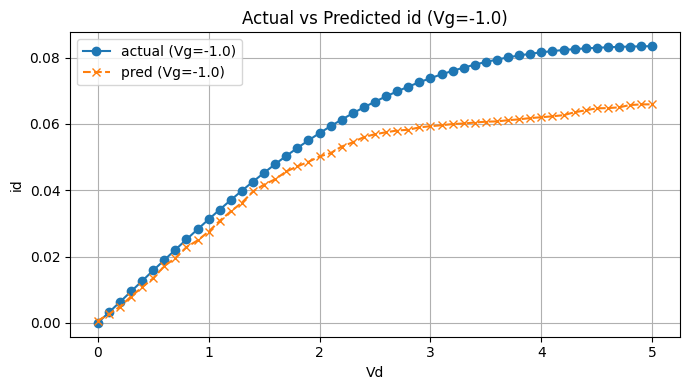

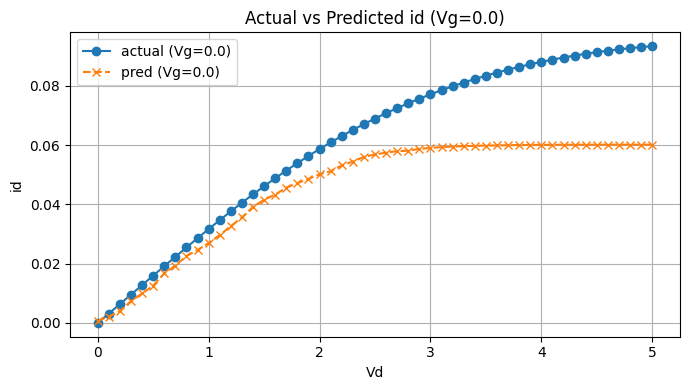

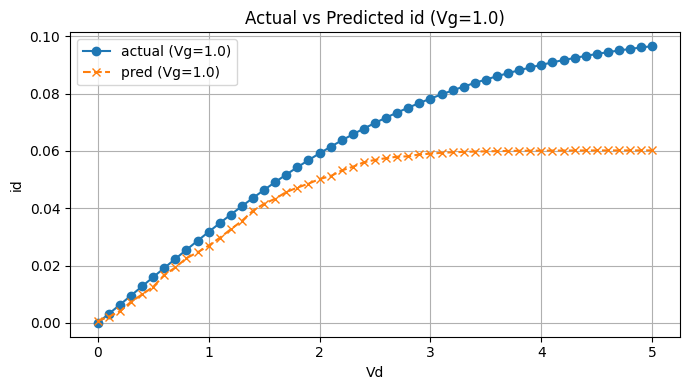

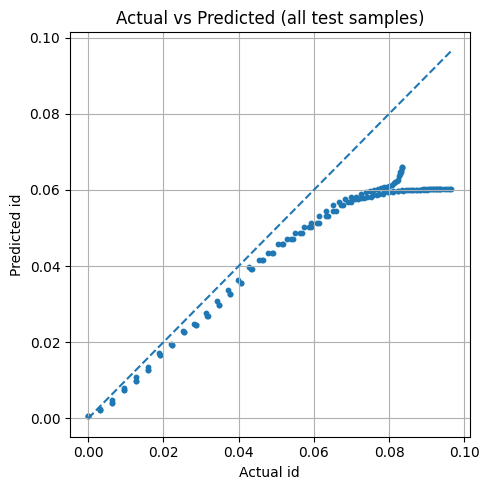


Sample predictions:
 Vd   Vg  id_actual  id_pred
0.0 -1.0   0.000002 0.000651
0.1 -1.0   0.003146 0.002579
0.2 -1.0   0.006305 0.004890
0.3 -1.0   0.009471 0.007956
0.4 -1.0   0.012647 0.010752
0.5 -1.0   0.015808 0.013450
0.6 -1.0   0.018948 0.017136
0.7 -1.0   0.022075 0.019556
0.8 -1.0   0.025167 0.022845
0.9 -1.0   0.028223 0.024871
1.0 -1.0   0.031224 0.027539
1.1 -1.0   0.034176 0.030784
1.2 -1.0   0.037058 0.033645
1.3 -1.0   0.039874 0.036252
1.4 -1.0   0.042611 0.039646
1.5 -1.0   0.045271 0.041705
1.6 -1.0   0.047886 0.043324
1.7 -1.0   0.050368 0.045654
1.8 -1.0   0.052752 0.047189
1.9 -1.0   0.055042 0.048575


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Uncomment if you want to mount drive in Colab
# drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/IdVd_D1_21_2.txt'

# ----- Read file robustly -----
def read_table_as_numeric(path):
    try:
        df = pd.read_csv(path, sep=r'\s+', header=None, dtype=float, engine='python',
                         comment='#', skip_blank_lines=False)
    except Exception:
        df = pd.read_csv(path, sep=r'\s+', header=None, dtype=str, engine='python',
                         comment='#', skip_blank_lines=False)
        df = df.replace(r'^\s*$', np.nan, regex=True)
        df = df.apply(lambda col: pd.to_numeric(col, errors='coerce'))
    df = df.dropna(how='all').dropna(axis=1, how='all').reset_index(drop=True)
    if df.shape[0] < 2 or df.shape[1] < 2:
        raise RuntimeError("File couldn't be parsed into expected id-vd table.")
    return df

df_num = read_table_as_numeric(file_path)

# Keep first 10 columns like you used previously (header + data)
df8 = df_num.iloc[:, :10].astype(float).copy()
arr = df8.values

# Interpret table: arr[0,1:] -> Vg header ; arr[1:,0] -> Vd ; arr[1:,1:] -> id_matrix
Vg_vals = arr[0, 1:].astype(float)
Vd_vals = arr[1:, 0].astype(float)
id_matrix = arr[1:, 1:].astype(float)

print("Raw parsed shapes -> Vg:", Vg_vals.shape, "Vd:", Vd_vals.shape, "id_matrix:", id_matrix.shape)

# ----- Correct filters (applied BEFORE building X/y) -----
# 1) remove vg == -6 or -7 AND keep only Vg in [-5, 1]
vg_keep_mask = (~np.isin(Vg_vals, [-6.0, -7.0])) & (Vg_vals >= -5.0) & (Vg_vals <= 1.0)
Vg_vals = Vg_vals[vg_keep_mask]
id_matrix = id_matrix[:, vg_keep_mask]

# 2) remove rows with Vd > 5  (KEEP Vd <= 5.0)
vd_keep_mask = (Vd_vals <= 5.0)
Vd_vals = Vd_vals[vd_keep_mask]
id_matrix = id_matrix[vd_keep_mask, :]

n_vd, n_vg = id_matrix.shape
print(f"After filtering: n_vd={n_vd}, n_vg={n_vg}")
print("Vg (after filter):", np.round(Vg_vals, 6))
print("Vd (after filter) sample:", np.round(Vd_vals[:10], 6))

# quick sanity check: shapes must align
assert id_matrix.shape == (len(Vd_vals), len(Vg_vals)), "Shapes mismatch after filtering"

# ----- Build dataset using filtered Vd_vals and Vg_vals -----
X_list = []
y_list = []
for i in range(len(Vd_vals)):
    vd = Vd_vals[i]
    if np.isnan(vd):
        continue
    for j in range(len(Vg_vals)):
        vg = Vg_vals[j]
        val = id_matrix[i, j]
        if np.isnan(vg) or np.isnan(val):
            continue
        X_list.append([vd, vg])
        y_list.append(val)

X = np.array(X_list)
y = np.array(y_list)
print("Total samples after filtering and building dataset:", X.shape[0])

# ----- Use Vg-range splitting you requested -----
# total considered Vg: [-5 .. 1]
# Train: Vg in [-5 .. -2]
# Test : Vg in [-1 .. 1]
train_mask_by_value = (X[:,1] >= -5.0) & (X[:,1] <= -2.0)
test_mask_by_value  = (X[:,1] >= -1.0) & (X[:,1] <=  1.0)

X_train = X[train_mask_by_value]
y_train = y[train_mask_by_value]
X_test  = X[test_mask_by_value]
y_test  = y[test_mask_by_value]

print("Train samples:", X_train.shape[0], "Test samples:", X_test.shape[0])
if X_train.shape[0] == 0:
    raise RuntimeError("Training set is empty after Vg-range selection ([-5,-2]) — check file contents.")
if X_test.shape[0] == 0:
    print("Warning: Test set is empty after Vg-range selection ([-1,1]). No test metrics will be produced.")

# ----- (Optional) add simple polynomial features to match your "initial" pipeline -----
def make_features(Xraw):
    vd = Xraw[:,0]
    vg = Xraw[:,1]
    return np.column_stack([vd, vg, vd*vg, vd*vd, vg*vg])

X_train_feats = make_features(X_train)
X_test_feats  = make_features(X_test) if X_test.shape[0] > 0 else np.empty((0,5))

# ----- Train RandomForest (like initial pipeline) -----
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_feats, y_train)
print("RandomForest training finished.")

# ----- Evaluate -----
if X_test_feats.size:
    y_pred = rf.predict(X_test_feats)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Test R^2: {r2:.6f}, Test MSE: {mse:.6e}")
else:
    y_pred = None
    print("No test samples to evaluate (test set empty).")

# ----- Save model & predictions -----
out_dir = os.path.dirname(file_path) or '.'
model_file = os.path.join(out_dir, "rf_idvd_model_vd5_filtered.pkl")
with open(model_file, "wb") as f:
    pickle.dump({'model': rf, 'feature_fn': 'vd,vg,vd*vg,vd^2,vg^2'}, f)
print("Saved model to:", model_file)

if y_pred is not None:
    results_df = pd.DataFrame({
        "Vd": X_test[:,0],
        "Vg": X_test[:,1],
        "id_actual": y_test,
        "id_pred": y_pred
    }).sort_values(["Vg","Vd"]).reset_index(drop=True)
    pred_file = os.path.join(out_dir, "predictions_idvd_vd5_filtered.csv")
    results_df.to_csv(pred_file, index=False)
    print("Saved predictions to:", pred_file)

    # plots per Vg
    unique_test_vg = sorted(set(results_df["Vg"].values))
    for vg in unique_test_vg:
        sub = results_df[results_df["Vg"] == vg].sort_values("Vd")
        plt.figure(figsize=(7,4))
        plt.plot(sub["Vd"], sub["id_actual"], marker='o', linestyle='-', label=f"actual (Vg={vg})")
        plt.plot(sub["Vd"], sub["id_pred"], marker='x', linestyle='--', label=f"pred (Vg={vg})")
        plt.xlabel("Vd")
        plt.ylabel("id")
        plt.title(f"Actual vs Predicted id (Vg={vg})")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # overall scatter
    plt.figure(figsize=(5,5))
    plt.scatter(results_df["id_actual"], results_df["id_pred"], s=10)
    mn = min(results_df["id_actual"].min(), results_df["id_pred"].min())
    mx = max(results_df["id_actual"].max(), results_df["id_pred"].max())
    plt.plot([mn, mx], [mn, mx], linestyle='--')
    plt.xlabel("Actual id")
    plt.ylabel("Predicted id")
    plt.title("Actual vs Predicted (all test samples)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\nSample predictions:")
    print(results_df.head(20).to_string(index=False))
else:
    print("No predictions to display (test set empty).")

# ----- plot_for_vg utility (uses filtered header values) -----
def plot_for_vg(vg_value, match_tolerance=1e-8):
    vg_array = np.array(Vg_vals)
    diffs = np.abs(vg_array - float(vg_value))
    idx = int(np.argmin(diffs))
    chosen_vg = float(vg_array[idx])
    if diffs[idx] > match_tolerance:
        print(f"Requested Vg={vg_value} not found exactly. Using nearest Vg={chosen_vg} (diff={diffs[idx]:.3g}).")
    else:
        print(f"Using exact Vg={chosen_vg} from header.")
    actual_ids = id_matrix[:, idx]
    mask = ~np.isnan(actual_ids) & ~np.isnan(Vd_vals)
    vd_valid = Vd_vals[mask]
    actual_valid = actual_ids[mask]
    if vd_valid.size == 0:
        raise RuntimeError("No valid actual id values for this Vg.")
    Xq_raw = np.column_stack([vd_valid, np.full(len(vd_valid), chosen_vg)])
    Xq_feats = make_features(Xq_raw)
    pred_valid = rf.predict(Xq_feats)
    plt.figure(figsize=(8,5))
    plt.plot(vd_valid, actual_valid, marker='o', linestyle='-', label=f'Actual (Vg={chosen_vg})')
    plt.plot(vd_valid, pred_valid, marker='x', linestyle='--', label=f'Predicted (Vg={chosen_vg})')
    plt.xlabel('Vd')
    plt.ylabel('id')
    plt.title(f'Actual vs Predicted id vs Vd for Vg = {chosen_vg}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return vd_valid, actual_valid, pred_valid


Original shapes: id_matrix (n_vd, n_vg) = (151, 9)
Original Vg header (sample): [-7. -6. -5. -4. -3. -2. -1.  0.  1.]
Original Vd column (sample): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]

After filtering:
  Kept Vg count: 7 Kept Vg values (sample): [-5. -4. -3. -2. -1.  0.  1.]
  Kept Vd count: 61 Kept Vd (first few): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
  id_matrix shape now: (61, 7)

Train Vg indices (relative to id_matrix columns): [0, 1, 2, 3]
 Train Vg values: [-5. -4. -3. -2.]
Test  Vg indices (relative to id_matrix columns): [4, 5, 6]
 Test  Vg values: [-1.  0.  1.]

Training samples: 244, Test samples: 183

Test R^2: 0.722187, Test MSE: 2.235911e-04
Saved predictions to: /content/drive/MyDrive/predictions_idvd_filtered.csv
Saved trained model to: /content/drive/MyDrive/rf_idvd_model_filtered.pkl

Plot for test Vg = -1.0
Using exact Vg=-1.0 from header.


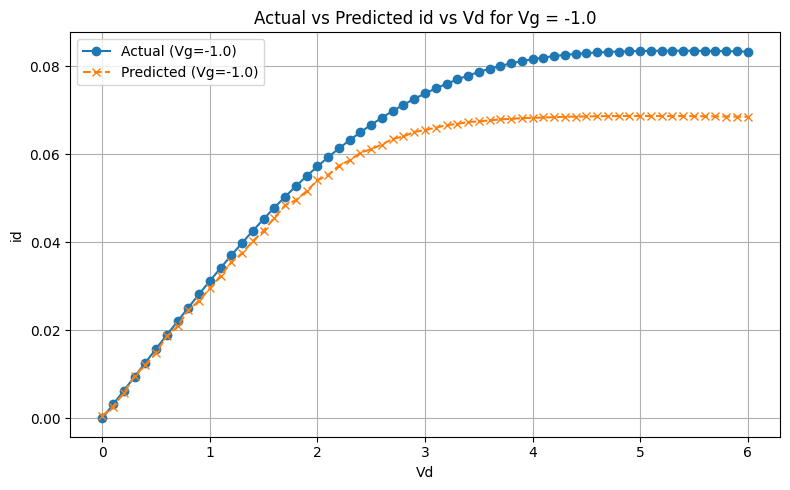


Plot for test Vg = 0.0
Using exact Vg=0.0 from header.


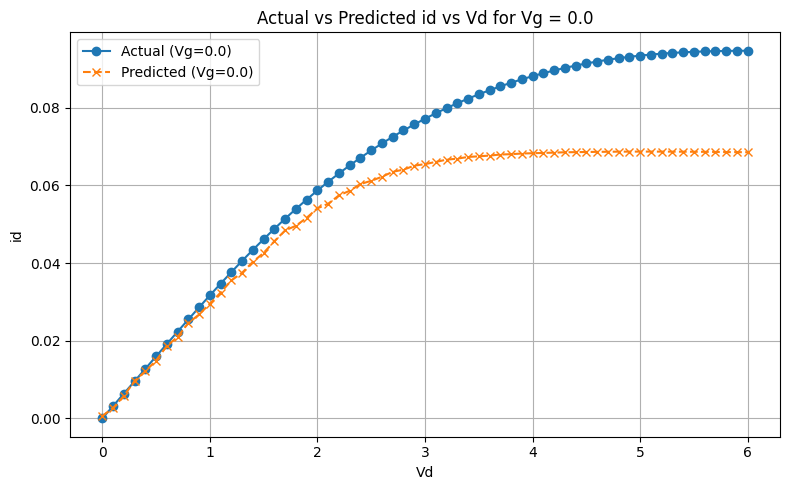


Plot for test Vg = 1.0
Using exact Vg=1.0 from header.


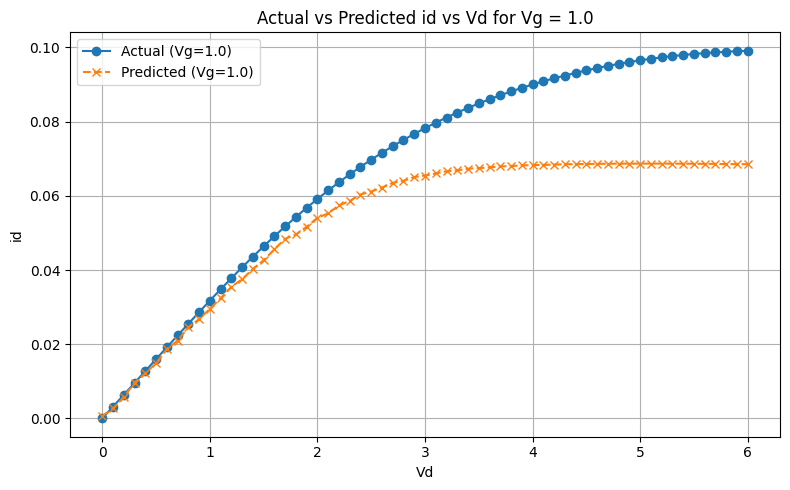

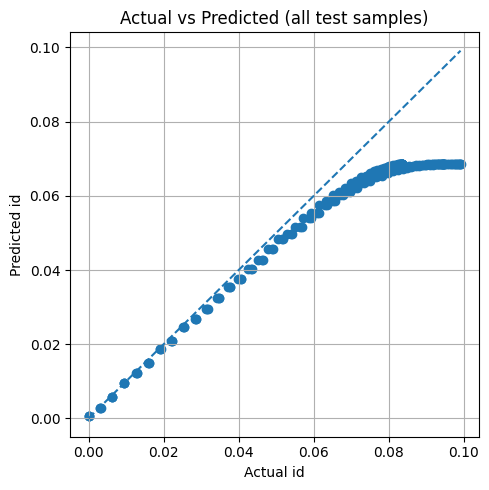


Sample of predictions:
 Vd   Vg  id_actual  id_pred
0.0 -1.0   0.000002 0.000604
0.1 -1.0   0.003146 0.002669
0.2 -1.0   0.006305 0.005750
0.3 -1.0   0.009471 0.009625
0.4 -1.0   0.012647 0.012124
0.5 -1.0   0.015808 0.014880
0.6 -1.0   0.018948 0.018662
0.7 -1.0   0.022075 0.020975
0.8 -1.0   0.025167 0.024547
0.9 -1.0   0.028223 0.026757
1.0 -1.0   0.031224 0.029515
1.1 -1.0   0.034176 0.032391
1.2 -1.0   0.037058 0.035506
1.3 -1.0   0.039874 0.037500
1.4 -1.0   0.042611 0.040295
1.5 -1.0   0.045271 0.042615
1.6 -1.0   0.047886 0.045606
1.7 -1.0   0.050368 0.048408
1.8 -1.0   0.052752 0.049581
1.9 -1.0   0.055042 0.051645


In [ ]:
# Full script: apply filters, split by Vg-value ranges (train [-5,-2], test [-1,1]), train RF, evaluate, save, and plot.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------ Setup: ensure `arr` and `file_path` exist (reconstruct if needed) ------------------
# Expecting `arr` to exist from earlier cells (df8.values). If not, attempt to rebuild from df_num/df_numeric.
try:
    _ = arr
except NameError:
    if 'df_num' in globals():
        df_tmp = df_num.dropna(how='all').dropna(axis=1, how='all').reset_index(drop=True)
    elif 'df_numeric' in globals():
        df_tmp = df_numeric.dropna(how='all').dropna(axis=1, how='all').reset_index(drop=True)
    else:
        raise RuntimeError("arr not found and cannot reconstruct. Ensure Cell 1 & 2 ran or provide `arr`.")
    # mimic the earlier slicing (first 10 cols) if original used that
    arr = df_tmp.iloc[:, :10].astype(float).values

# file_path used later for saving; if not present, default to current directory with a placeholder filename
try:
    file_path
except NameError:
    file_path = "./data_source_placeholder.txt"
    print(f"Note: file_path not found; using default: {file_path}")

# ------------------ Parse original orientation ------------------
# arr[0,1:] are Vg header values; arr[1:,0] are Vd values; arr[1:,1:] is id_matrix
Vg_vals_orig = arr[0, 1:].astype(float)      # header Vg values (columns)
Vd_vals_orig = arr[1:, 0].astype(float)      # row Vd values (rows)
id_matrix_orig = arr[1:, 1:].astype(float)   # shape (n_vd, n_vg)

print("Original shapes: id_matrix (n_vd, n_vg) =", id_matrix_orig.shape)
print("Original Vg header (sample):", Vg_vals_orig[:10])
print("Original Vd column (sample):", Vd_vals_orig[:10])

# ------------------ APPLY FILTERS ------------------
# 1) Remove vg = -6, -7 (filter out these Vg columns)
bad_vg_values = [-6.0, -7.0]
keep_vg_mask = np.ones_like(Vg_vals_orig, dtype=bool)
for bad in bad_vg_values:
    keep_vg_mask &= ~np.isclose(Vg_vals_orig, bad, atol=1e-8)

# 2) Remove rows with Vd > 6 (keep Vd <= 6)
keep_vd_mask = ~np.isnan(Vd_vals_orig) & (Vd_vals_orig <= 6.0)

# Apply masks to produce filtered arrays
Vg_vals = Vg_vals_orig[keep_vg_mask]
Vd_vals = Vd_vals_orig[keep_vd_mask]
id_matrix = id_matrix_orig[keep_vd_mask, :][:, keep_vg_mask]  # rows filtered by Vd, cols filtered by Vg

n_vd, n_vg = id_matrix.shape
print("\nAfter filtering:")
print("  Kept Vg count:", n_vg, "Kept Vg values (sample):", Vg_vals[:20])
print("  Kept Vd count:", n_vd, "Kept Vd (first few):", Vd_vals[:10])
print("  id_matrix shape now:", id_matrix.shape)

# ------------------ Basic NaN checks ------------------
if np.isnan(Vg_vals).any():
    print("Warning: some Vg header values are NaN. Those columns will be skipped automatically.")
if np.isnan(Vd_vals).any():
    print("Warning: some Vd header values are NaN. Those rows will be skipped automatically.")

# ------------------ DEFINE TRAIN / TEST BY Vg VALUE RANGES ------------------
# Train: Vg in [-5, -2], Test: Vg in [-1, 1]
tol = 1e-8
Vg_array = np.array(Vg_vals)

train_mask = (Vg_array >= -5.0 - tol) & (Vg_array <= -2.0 + tol)
test_mask  = (Vg_array >= -1.0 - tol) & (Vg_array <=  1.0 + tol)

train_col_indices = np.where(train_mask)[0].tolist()
test_col_indices  = np.where(test_mask)[0].tolist()

# Safety checks
if len(train_col_indices) == 0:
    raise RuntimeError("No Vg columns found in the train range [-5, -2]. Check header Vg values after filtering.")
if len(test_col_indices) == 0:
    print("Warning: No test Vg columns found in the test range [-1, 1]. Check header Vg values after filtering.")

print("\nTrain Vg indices (relative to id_matrix columns):", train_col_indices)
if train_col_indices:
    print(" Train Vg values:", Vg_array[train_col_indices])
print("Test  Vg indices (relative to id_matrix columns):", test_col_indices)
if test_col_indices:
    print(" Test  Vg values:", Vg_array[test_col_indices])

# Ensure train/test do not overlap
if set(train_col_indices) & set(test_col_indices):
    raise RuntimeError("Train and test Vg column sets overlap. Adjust ranges.")

# ------------------ Build datasets (Vd, Vg) -> id and split by column membership ------------------
X_train = []
y_train = []
X_test  = []
y_test  = []

for i in range(n_vd):
    vd = Vd_vals[i]
    for j in range(n_vg):
        vg = Vg_vals[j]
        val = id_matrix[i, j]
        if np.isnan(val) or np.isnan(vg) or np.isnan(vd):
            continue
        if j in train_col_indices:
            X_train.append([vd, vg])
            y_train.append(val)
        elif j in test_col_indices:
            X_test.append([vd, vg])
            y_test.append(val)
        # else: ignore any columns outside train/test selection

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test  = np.array(X_test)
y_test  = np.array(y_test)

print(f"\nTraining samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

if X_train.shape[0] == 0 or X_test.shape[0] == 0:
    if X_train.shape[0] == 0:
        raise RuntimeError("Empty train set after splitting. Check that the id matrix had values in the requested training columns.")
    else:
        print("Warning: Empty test set after splitting. Check that the id matrix had values in the requested test columns.")

# ------------------ Train a RandomForest regressor ------------------
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# ------------------ Predict and evaluate (if test set not empty) ------------------
if X_test.shape[0] > 0:
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\nTest R^2: {r2:.6f}, Test MSE: {mse:.6e}")
else:
    print("\nNo test samples to evaluate metrics.")

# ------------------ Build a results DataFrame and save (if test present) ------------------
if X_test.shape[0] > 0:
    results_df = pd.DataFrame({
        "Vd": X_test[:, 0],
        "Vg": X_test[:, 1],
        "id_actual": y_test,
        "id_pred": y_pred
    })
    # sort rows for nicer plotting
    results_df = results_df.sort_values(["Vg", "Vd"]).reset_index(drop=True)

    out_dir = os.path.dirname(file_path) or "."
    if not os.path.exists(out_dir):
        try:
            os.makedirs(out_dir, exist_ok=True)
        except Exception:
            out_dir = "."
    pred_file = os.path.join(out_dir, "predictions_idvd_filtered.csv")
    results_df.to_csv(pred_file, index=False)
    print(f"Saved predictions to: {pred_file}")

# Save trained model
out_dir = os.path.dirname(file_path) or "."
model_file = os.path.join(out_dir, "rf_idvd_model_filtered.pkl")
with open(model_file, "wb") as f:
    pickle.dump(model, f)
print(f"Saved trained model to: {model_file}")

# ------------------ Plotting helpers ------------------
def plot_for_vg(vg_value, match_tolerance=1e-6):
    """
    For a given Vg value (exact match or nearest in header), plot id vs Vd:
    - actual (from file) and predicted (from trained model).
    Returns (vd_valid, actual_valid, pred_valid)
    """
    vg_array = np.array(Vg_vals)
    diffs = np.abs(vg_array - float(vg_value))
    idx = int(np.argmin(diffs))
    chosen_vg = float(vg_array[idx])
    if diffs[idx] > match_tolerance:
        print(f"Requested Vg={vg_value} not found exactly in header. Using nearest Vg={chosen_vg} (diff={diffs[idx]:.3g}).")
    else:
        print(f"Using exact Vg={chosen_vg} from header.")

    # Extract actual id vs Vd if available
    actual_ids = id_matrix[:, idx]   # length n_vd
    mask = ~np.isnan(actual_ids) & ~np.isnan(Vd_vals)
    vd_valid = Vd_vals[mask]
    actual_valid = actual_ids[mask]

    if vd_valid.size == 0:
        raise RuntimeError(f"No valid actual id values available for Vg column index {idx}.")

    # Predict for the same vd values
    Xq = np.column_stack([vd_valid, np.full(len(vd_valid), chosen_vg)])
    pred_valid = model.predict(Xq)

    # Plot actual vs predicted (id vs Vd)
    plt.figure(figsize=(8,5))
    plt.plot(vd_valid, actual_valid, marker='o', linestyle='-', label=f'Actual (Vg={chosen_vg})')
    plt.plot(vd_valid, pred_valid, marker='x', linestyle='--', label=f'Predicted (Vg={chosen_vg})')
    plt.xlabel('Vd')
    plt.ylabel('id')
    plt.title(f'Actual vs Predicted id vs Vd for Vg = {chosen_vg}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return vd_valid, actual_valid, pred_valid

# ------------------ Generate plots for each test Vg (if present) ------------------
if X_test.shape[0] > 0:
    test_vgs = sorted(set(X_test[:,1]))
    for tvg in test_vgs:
        print(f"\nPlot for test Vg = {tvg}")
        plot_for_vg(tvg)
else:
    print("\nNo test Vg columns available to plot using plot_for_vg(). You can still call plot_for_vg(vg) for any header Vg.")

# ------------------ Optional: quick overall actual vs predicted scatter ------------------
if X_test.shape[0] > 0:
    plt.figure(figsize=(5,5))
    plt.scatter(results_df["id_actual"], results_df["id_pred"])
    mn = min(results_df["id_actual"].min(), results_df["id_pred"].min())
    mx = max(results_df["id_actual"].max(), results_df["id_pred"].max())
    plt.plot([mn, mx], [mn, mx], linestyle='--')
    plt.xlabel("Actual id")
    plt.ylabel("Predicted id")
    plt.title("Actual vs Predicted (all test samples)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ------------------ Print small sample of predictions ------------------
if X_test.shape[0] > 0:
    print("\nSample of predictions:")
    print(results_df.head(20).to_string(index=False))
else:
    print("\nNo test predictions to display.")
